# Arboles de regresión

Usamos árboles de regresión para predecir variables continuas a partir de variables continuas.

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

#crim = crime rate en la ciudad por persona
#nox = concentracion de oxido nitroso
#medv = precio medio en miles de $
#https://www.kaggle.com/c/boston-housing
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]

X = data[predictors]
y = data[target]
X.shape

(506, 13)

In [4]:
tree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [5]:
preds = tree.predict(X)
data["predictions"] = preds

data[["medv", "predictions"]].head()

,medv,predictions
0,24.0,22.840000
1,21.6,22.840000
2,34.7,35.247826
3,33.4,35.247826
4,36.2,35.247826


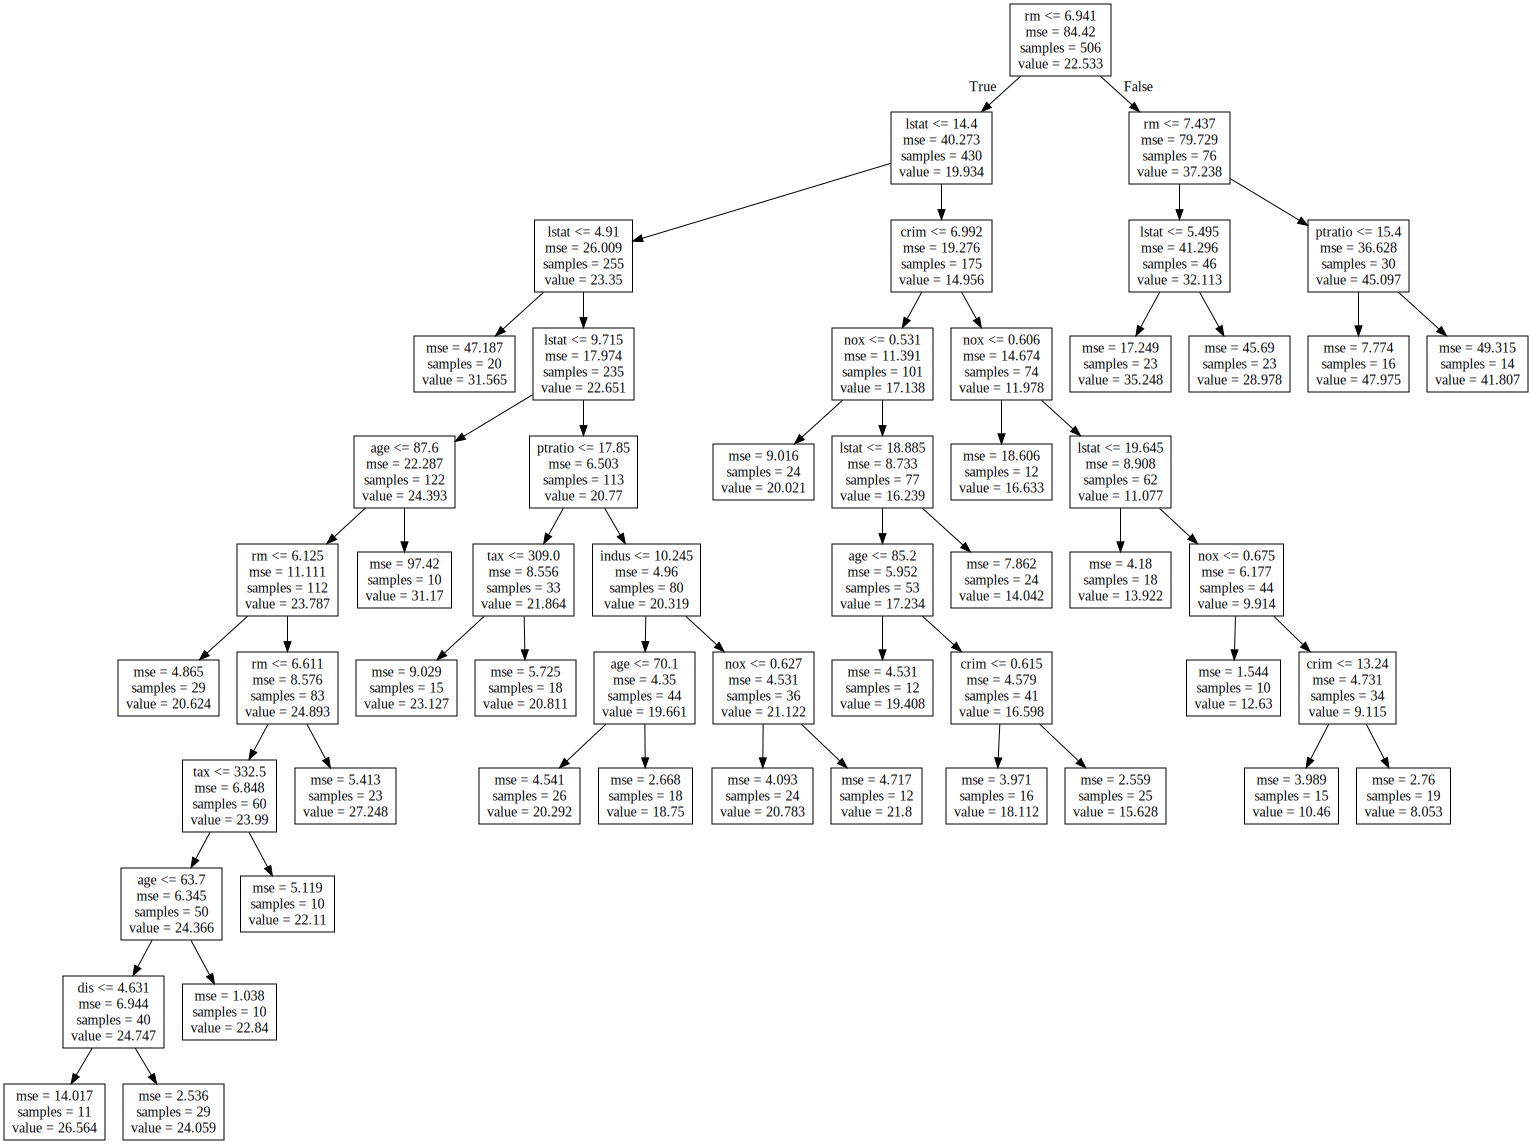

In [6]:
from sklearn.tree import export_graphviz
import os
from graphviz import Source

with open("boston_rtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

file = open("boston_rtree.dot", "r")
Source(file.read())

In [22]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=1)
print(scores)
np.mean(scores)

[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]


-20.107307036443846

In [25]:
list(zip(predictors, tree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]